# Main Notebook

## Imports

### Adds src folder to path

In [157]:
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath('../src'))

In [158]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import common libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Load data

In [160]:
data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")
# data.set_index("Id", inplace=True)
data.drop(inplace=True, columns=["Id"])
# test_data.dropna(inplace=True)

# drop columns
data = data.drop(columns=["Street","Alley","Utilities","LandSlope"])

data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
763,60,RL,82.0,9430,Reg,Lvl,Inside,NoRidge,Norm,Norm,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337000
902,60,RL,63.0,7875,Reg,Lvl,Inside,Gilbert,Norm,Norm,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,180000
266,60,RL,70.0,11207,IR1,HLS,FR2,Gilbert,Norm,Norm,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,185000
52,90,RM,110.0,8472,IR2,Bnk,Corner,IDOTRR,RRNn,Norm,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
1365,60,FV,NaN,7500,Reg,Lvl,Inside,Somerst,Norm,Norm,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
1337,30,RM,153.0,4118,IR1,Bnk,Corner,OldTown,Feedr,Norm,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500
396,20,RL,60.0,7200,Reg,Low,Inside,CollgCr,Norm,Norm,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,123000
229,120,RL,43.0,3182,Reg,Lvl,Inside,Blmngtn,Norm,Norm,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
599,160,RM,24.0,1950,Reg,Lvl,Inside,Blueste,Norm,Norm,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
1023,120,RL,43.0,3182,Reg,Lvl,Inside,Blmngtn,Norm,Norm,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000


HalfBath
0    913
1    535
2     12
Name: count, dtype: int64


<Axes: >

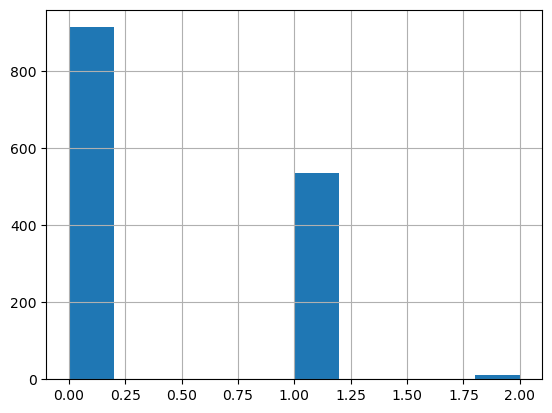

In [222]:
col = "HalfBath"
print(data[col].value_counts(dropna=False))
data[col].hist()

In [162]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Explorer the dat

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [164]:
# sale price

data["SalePrice"].describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

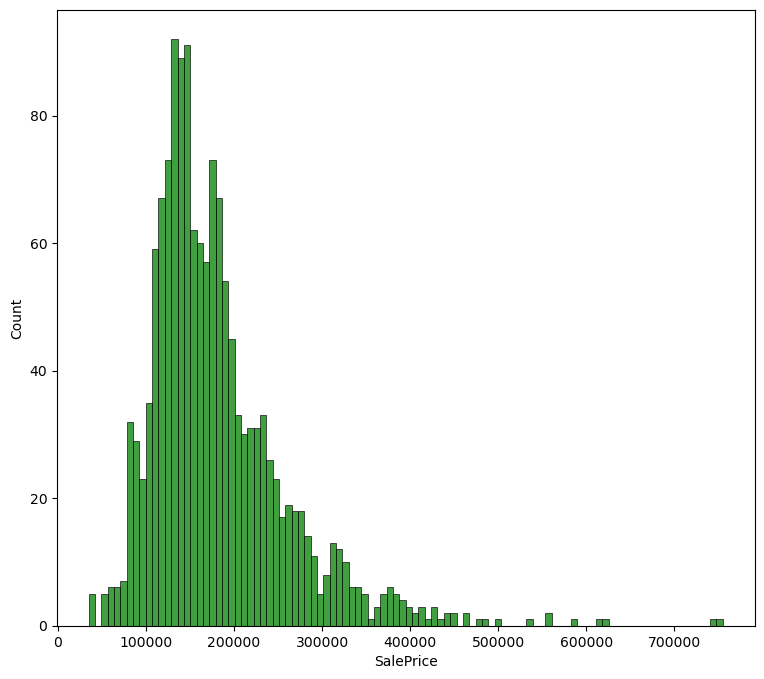

In [165]:
plt.figure(figsize=(9, 8))
sns.histplot(data=data, x="SalePrice", color='g', bins=100, kde_kws={'alpha': 0.4});

In [166]:
from data_proccessing_util import get_df_info


get_df_info(data)

Shape:  (1460, 76) 

Columns:  ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeat

In [167]:
# sns.pairplot(data.sample(100))

In [168]:
# find categories

data.dtypes.to_list()

[dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('

### Numerical featues

In [169]:



num_data = data.select_dtypes(include=["int64"])
num_columns = num_data.columns.to_list()
num_columns.remove("SalePrice")

print(num_columns)
num_data.head()

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [170]:
# log_num_data =  num_data["area"].apply(lambda x: np.log(x))

# log_num_data.hist(figsize=(8,8), bins=50, xlabelsize=8, ylabelsize=8)
# num_data["area"] = log_num_data # uncomment to use the log of the area instead of the area data

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'Tot

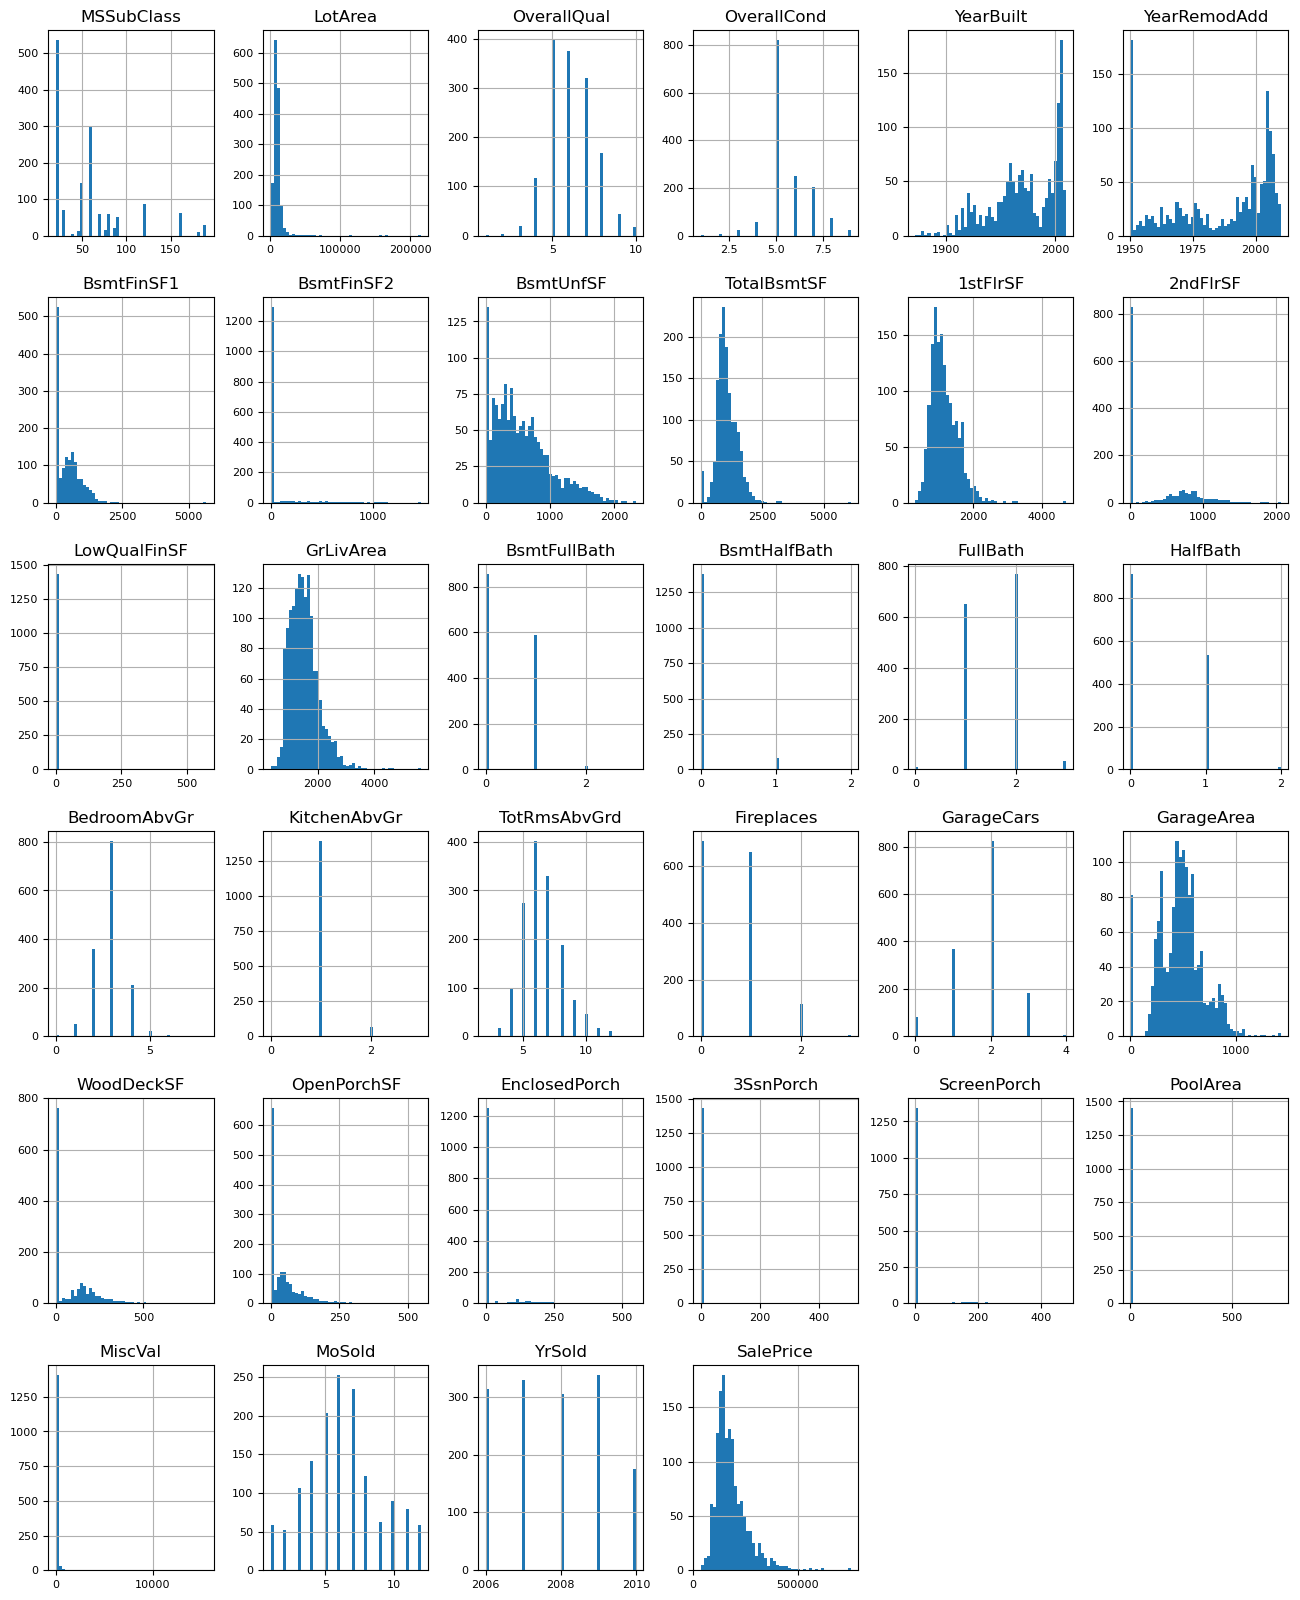

In [171]:
# numeric features distribution

num_data.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

### Categorical features

In [172]:
cat_data = data.select_dtypes(exclude=["int64"])
cat_columns = cat_data.columns.to_list()
print(cat_columns)
cat_data.head()

['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,80.0,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,68.0,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,60.0,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,1998.0,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,84.0,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [173]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [174]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [175]:
y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

# y_train = y
# X_train = X

# y_test = test_data["SalePrice"]
# X_test = test_data.drop(columns=["SalePrice"])

## Model

### Transform pipeline

In [176]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [177]:
# # create the drop list for the categorical data
# drop_cat = ["no" for _ in cat_columns]
# drop_cat[-1] = "unfurnished"
# drop_cat
drop_cat =[]

In [178]:
# Create preprocessor

# categorical data transformer
categorical = Pipeline(steps=[
    ('encoding', OneHotEncoder(
        handle_unknown="ignore",
        # drop=[]
        drop="first"
        
    ))
    ])

# numberical data scaling transformer
numerical = Pipeline( steps=[
    ("scaling", StandardScaler())
])

preproccesor = ColumnTransformer([
    ("categorical", categorical, cat_columns),
    ("numerical", numerical, num_columns)
])

model = Pipeline(steps=[
    ("prepocessor", preproccesor),
    ("regressor", TransformedTargetRegressor(regressor = LinearRegression(), transformer= MinMaxScaler()))
])





### Train model

In [179]:
# Create the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




In [180]:
model.fit(X_train, y_train)

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotFrontage',
                                                   'LotShape', 'LandContour',
                                                   'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrTyp...
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea', ...])])),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=MinMaxScaler()))])

### Test the model

In [181]:
# get prediction with test data

# y_pred = model.predict(test_data)
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1, 7, 11, 15, 29, 39] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [182]:
# import sklean model testing methods

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  # type: ignore

# test model using the predicted y and the test y (original not modified y)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
# uses the square=False attribute to return the not squared (root)
rmse = root_mean_squared_error(y_test, y_pred, )
r2 = r2_score(y_test, y_pred)


print(
    f"MAE: {mae}\nMSE: {mse}\n\nRMSE: {rmse}\nR2: {r2}"
)

MAE: 29576.66889561871
MSE: 3491653307.2236786

RMSE: 59090.213294789166
R2: 0.49439195386175994


In [183]:
# creates a random dictionary to use as the UI test data

from typing import Any


sample_prediction_row = data.sample(1)
sample_idx = sample_prediction_row["SalePrice"].index[0]
print(sample_idx)
sample_prediction_row




446


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
446,20,RL,137.0,16492,IR1,Lvl,Corner,NAmes,PosA,Norm,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000


In [184]:
print(f"Price: {sample_prediction_row['SalePrice']}")

Price: 446    190000
Name: SalePrice, dtype: int64


In [185]:
sample_prediction_row.drop(columns=["SalePrice"]).to_dict(orient="index" ).get(400)

In [186]:

# In this implementation the values are just number, so sample prediction is a dictionary with values
sample_prediction:dict|Any = sample_prediction_row.drop(columns=["SalePrice"]).to_dict(orient="index" ).get(sample_idx)
observation = pd.Series(sample_prediction).to_frame().T 
observation

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,137.0,16492,IR1,Lvl,Corner,NAmes,PosA,Norm,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [187]:
# make prediction of observation


model.predict(observation)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([219717.31271366])

### Graph prediction

<Axes: xlabel='SalePrice'>

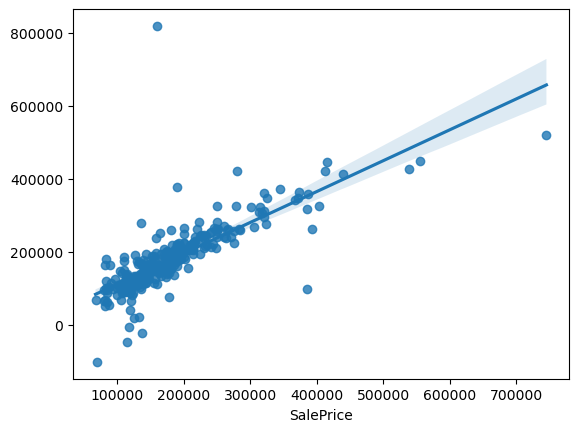

In [188]:
sns.regplot(x=y_test, y=y_pred)

In [189]:
import statsmodels.api as sm

sum_mol = sm.OLS()

TypeError: OLS.__init__() missing 1 required positional argument: 'endog'